In [131]:
from string import punctuation
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stopwords = ENGLISH_STOP_WORDS


def lowercase_text(text):
    '''Returns a text string with all characters lower-cased.

    Parameters
    ----------
    text: str

    Returns
    -------
    text_lowercased: str

    Examples
    --------
    >>> lowercase_text('AbC')
    'abc'
    '''
    return text.lower()


def remove_punctuation(text, punctuation=punctuation):
    '''Returns a text string without punctuation.

    Parameters
    ----------
    text: str
    punctuation: str
        A string containing all the punctuation characters to remove.

    Returns
    -------
    text_nopunct: str

    Examples
    --------
    >>> remove_punctuation("here's johnny!")
    'heres johnny'
    '''
    return ''.join([char for char in text if char not in punctuation])


def remove_newline(text):
    '''Removes all newlines in a line of text

    Parameters
    ----------
    text: str

    Returns
    -------
    text_no_nl: str

    Examples
    --------
    >>> remove_newline("\nlife happens when youre busy\n making other plans\n")
    'life happens when youre busy making other plans'
    '''
    out_text = text.replace('\n','')
    return out_text


def split_text_into_words(text):
    '''Splits a text string into a word list

    Parameters
    ----------
    text: str

    Returns
    -------
    words: list of str

    Examples
    --------
    >>> split_text_into_words("get started by stop talking and begin doing")
    ['get', 'started', 'by', 'stop', 'talking', 'and', 'begin', 'doing']
    '''
    return text.split()


def remove_stopwords(word_lst, stopwords_set):
    '''Removes words from word_lst if in the stopwords_set

    Parameters
    ----------
    word_lst: list of str
    stopwords_set: set of str

    Returns
    -------
    word_lst_no_sw: list of str

    Examples
    --------
    >>> remove_stopwords(['tell', 'me', 'and', 'i', 'forget'], set(['and', 'i']))
    ['tell', 'me', 'forget']
    '''
    return [word for word in word_lst if word not in  stopwords_set]


def replace_names(word_lst, name_set, replacement_val):
    '''Replaces names in word_lst with replacement_val.
    Names are identified in the name set.

    Parameters
    ----------
    word_lst: list of str
    name_set: set of str
    replacement_val: str
        The string to replace the names with.

    Returns
    -------
    word_lst_replaced_names: list of str

    Examples
    --------
    >>> replace_names(['daryl', 'daryl'], set(['larry', 'darryl']), 'person')
    ['person', 'person']
    '''
    return [word if word not in name_set else replacement_val for word in word_lst]


def create_cleaned_textline_from_words(words):
    '''Makes a single string from a list of words.

    Parameters
    ----------
    words: list of str

    Returns
    -------
    cleaned_text: str

    Examples
    --------
    >>> create_cleaned_textline_from_words(['darkest', 'moments', 'focus', 'light'])
    'darkest moments focus light'
    '''
    return ' '.join(words)


def line_cleaning_pipeline(text, stopwords_set):
    '''Transforms raw text into clean text using text-cleaning functions above'''
    text_lc = lowercase_text(text)
    text_np = remove_punctuation(text_lc)
    text_nnl = remove_newline(text_np)
    words = split_text_into_words(text_nnl)
    words_nsw = remove_stopwords(words, stopwords_set)
    #words_cleaned = replace_names(words_nsw, name_set = [], replace_val)
    line_of_text_cleaned = create_cleaned_textline_from_words(words_nsw)
    return line_of_text_cleaned


if __name__ == '__main__':
    # to help test functions and pipeline:
    text_str1 = "Seok-woo, a divorced fund manager, is a workaholic and absentee father to \nhis"
    text_str2 = "young daughter, Su-an. For her birthday the next day, she wishes for her father\n"
    text_str3 = "to take her to Busan to see her mother. \nThey board the KTX at Seoul Station."

    # your code below
    text = text_str1
    text_lc = lowercase_text(text)
    text_np = remove_punctuation(text_lc)
    print(type(text_np))
    text_nnl = remove_newline(text_np)
    words = split_text_into_words(text_nnl)
    print(words)
    words_nsw = remove_stopwords(words, stopwords_set = ENGLISH_STOP_WORDS)
#     words_cleaned = replace_names(words_nsw, name_set, replace_val)
    line_of_text_cleaned = create_cleaned_textline_from_words(words_nsw)
    print(f"Original: {text}")
    print(f"Lowercased: {text_lc}.")
    print(f"W)punc: {text_np}")
    print(f"WOnewline: {text_nnl}.")
    print(f"ASwords: {words}.")
    print(f"WOstops: {words_nsw}")
#     print(f"Cleaned: {words_cleaned}.")
    print(f"Joined: {line_of_text_cleaned}.")
    
    file_ = line_cleaning_pipeline(text = text_str1, stopwords_set = ENGLISH_STOP_WORDS)

<class 'str'>
['seokwoo', 'a', 'divorced', 'fund', 'manager', 'is', 'a', 'workaholic', 'and', 'absentee', 'father', 'to', 'his']
Original: Seok-woo, a divorced fund manager, is a workaholic and absentee father to 
his
Lowercased: seok-woo, a divorced fund manager, is a workaholic and absentee father to 
his.
W)punc: seokwoo a divorced fund manager is a workaholic and absentee father to 
his
WOnewline: seokwoo a divorced fund manager is a workaholic and absentee father to his.
ASwords: ['seokwoo', 'a', 'divorced', 'fund', 'manager', 'is', 'a', 'workaholic', 'and', 'absentee', 'father', 'to', 'his'].
WOstops: ['seokwoo', 'divorced', 'fund', 'manager', 'workaholic', 'absentee', 'father']
Joined: seokwoo divorced fund manager workaholic absentee father.


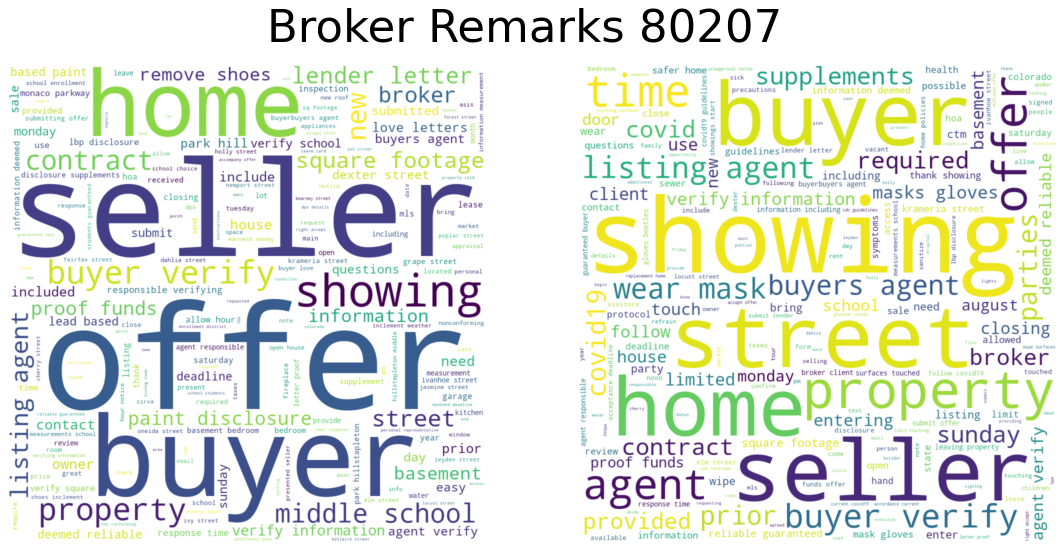

In [145]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# make a function for reading in a .txt file
def read_txt_file(txt_file):
    ''' reads a .txt file
        returns a text string
    '''
    f = open(txt_file, 'r')
    txt_string = f.read()
    return txt_string

pre = read_txt_file('../data/precovid.txt')

file_pre = line_cleaning_pipeline(text = pre, stopwords_set = ENGLISH_STOP_WORDS)
wordcloud1 = WordCloud(background_color = 'white', width = 960,
                     height = 960, margin = 8).generate(file_pre)

post = read_txt_file('../data/postcovid.txt')

file_post = line_cleaning_pipeline(text = post, stopwords_set = ENGLISH_STOP_WORDS)
wordcloud2 = WordCloud(background_color = 'white', width = 960,
                     height = 960, margin = 8).generate(file_post)



fig, axs = plt.subplots(1, 2, figsize = (16,8))
fig.suptitle("Broker Remarks 80207", fontsize=45)
fig.tight_layout()
axs[0].imshow(wordcloud1, interpolation = 'bilinear')
axs[0].axis(False)
axs[0].set_ylabel('Pre-Covid 2019: Apr - Sept')


axs[1].imshow(wordcloud2, interpolation = 'bilinear')
axs[1].axis(False)
axs[1].set_ylabel('Post-Covid 2020: Apr - Sept')

plt.savefig('covid.png')

plt.show();



In [133]:
!pwd


/Users/lisapaige/Desktop/den-19/repos/python-intro/src


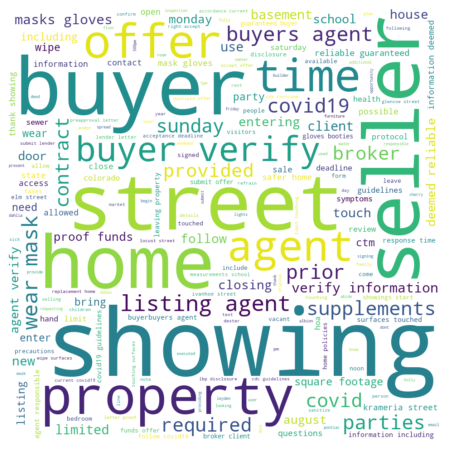

In [134]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# make a function for reading in a .txt file
def read_txt_file(txt_file):
    ''' reads a .txt file
        returns a text string
    '''
    f = open(txt_file, 'r')
    txt_string = f.read()
    return txt_string

eddie = read_txt_file('../data/postcovid.txt')

file_ed = line_cleaning_pipeline(text = eddie, stopwords_set = ENGLISH_STOP_WORDS)
wordcloud = WordCloud(background_color = 'white', width = 960,
                     height = 960, margin = 8).generate(file_ed)

fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.savefig('post.png')
plt.show();

In [147]:
'string of strings'* 5

'string of stringsstring of stringsstring of stringsstring of stringsstring of strings'